Najít i měsíce!

In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [61]:
dvatisice = df[df['245_a'].str.contains(r'[Rr]o(k|ku|ce|kem) (2000|dva tisíce)',na=False)]

C:\Users\micha\AppData\Local\Temp\ipykernel_38280\2724250331.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dvatisice = df[df['245_a'].str.contains(r'[Rr]o(k|ku|ce|kem) (2000|dva tisíce)',na=False)]


<Axes: xlabel='rok'>

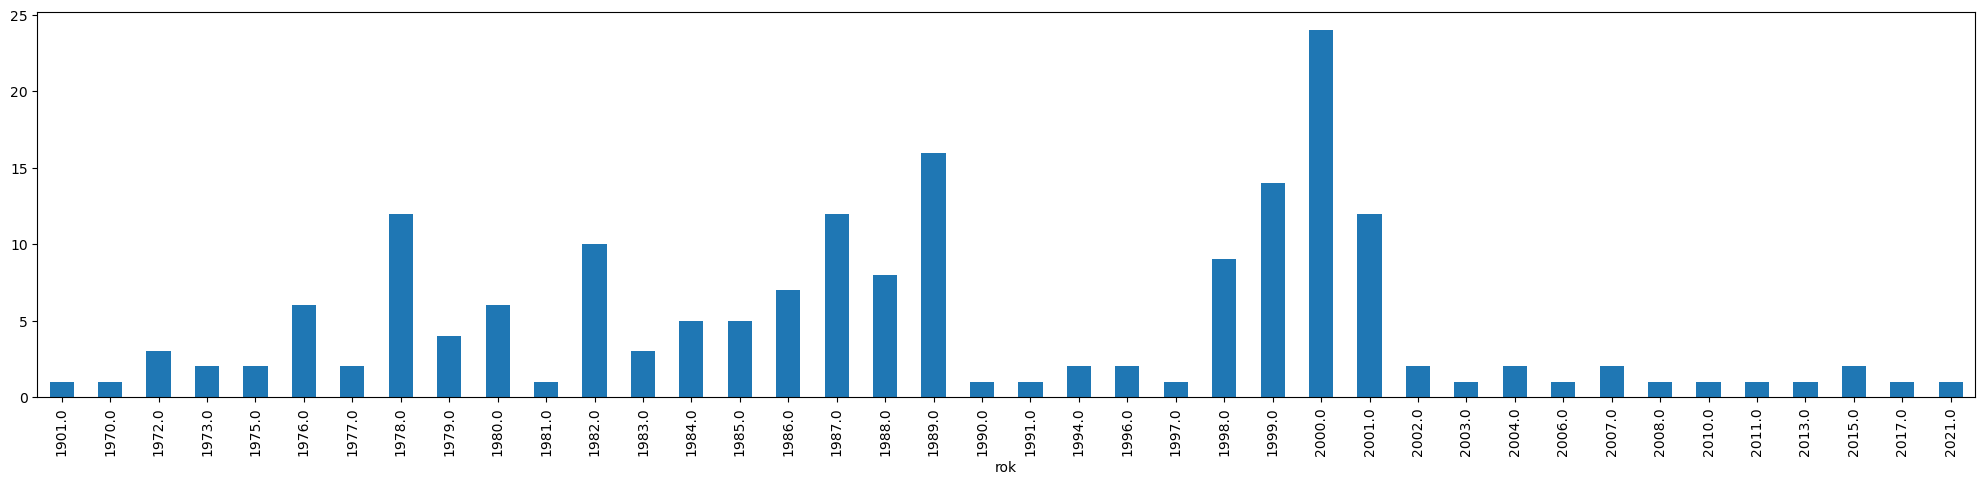

In [65]:
dvatisice.groupby('rok').size().plot.bar(figsize=(25,5))

In [104]:
dvatisice.sort_values(by='rok').head(1)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,letopocet
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknhak00059,010224s1901 xr e 000 f cze,None,None,[(Brož.)],[cze],[eng],1,None,[821.111(73)-3],[Americká próza],"[821.111(73)-31, (0:82-31)]",[aut],skuk0000091,"Bellamy, Edward,",1850-1898,Česky,Pohled z roku 2000 na rok 1887 :,napsal Edward Bellamy ; se svolením autorovým ...,None,None,None,None,None,[V Praze :],"[Právo lidu,]",[1901],None,[(Dělnická knihtiskárna)],None,None,None,None,None,[270 s. ;],None,[16 cm],None,None,[Příloha Práva lidu],None,None,None,None,None,None,None,None,None,None,None,[americké romány],[trl],[jk01042267],"[Horská, Marie,]",[1914-1994],None,None,None,None,None,None,None,nam a22 1 4500,1901.0,2000


<Axes: xlabel='rok'>

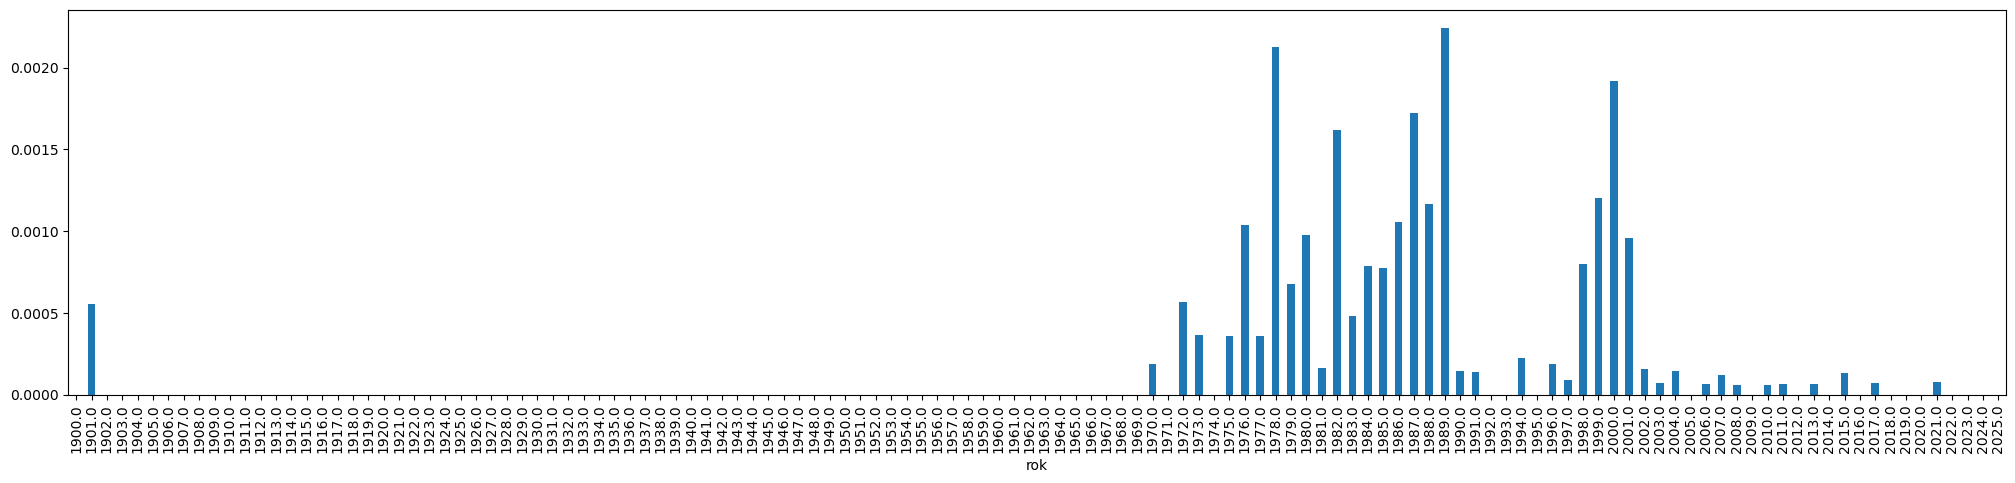

In [63]:
(dvatisice.groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [79]:
def letopocet(nazev):
    letop = re.search(r'[Rr]o(k|ku|ce|kem) \d{2,4}',nazev)
    if letop:
        return letop.group(0).split(' ')[1]

In [87]:
def ctyrcisli(nazev):
    ctyrc = re.search(r'\d{4}',nazev)
    if ctyrc:
         return ctyrc.group(0)

In [81]:
df['letopocet'] = df['245_a'].apply(lambda x: letopocet(x))

In [89]:
df['ctyrcisli'] = df['245_a'].apply(lambda x: ctyrcisli(x))

In [25]:
df[df['letopocet'].notnull()]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,letopocet
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk192600077,000614s1925 xr cze,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Spolek československých průmyslníků textilních...,None,None,None,None,None,None,[Praha :],"[Spol. českosl. průmysl. text.,]",[1925],None,[(Politika)],None,None,None,None,None,[47 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1925.0,1924
bk192600093,000615s1925 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01132221,"Teplý, Jan,",1865-,None,Českoslov. dobrovol. hasičstvu na pamět sjezdu...,napsal a sestavil Jan Teplý,None,None,None,None,None,[Jilemnice :],"[Jan Teplý,]",[1925],None,[(O. Baumgartner)],None,None,None,None,None,[16 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1925.0,1925
bk192600186,000616s1923 xr cze,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Ročenka Ex libris na rok 1924,None,None,None,None,None,None,[[Praha :],"[V. Rytíř,]",[1923]],None,None,None,None,None,None,None,[2 listy :],[15 graf. tisků ;],"[27,2 × 19 cm]",None,None,[Vyd. 120 číslov. výt.],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1923.0,1924
bk192600187,000616s1924 xr cze,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Ročenka Ex libris na rok 1925,None,None,None,None,None,None,[Praha :],"[V. Rytíř,]",[[1924]],None,None,None,None,None,None,None,[2 listy :],[16 graf. tisků ;],"[27 × 19,2 cm]",None,None,"[Vydal Václav Rytíř v Praze, Vyd. 100 číslov. ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1924.0,1925
bk192600230,000616q19221926xr cze,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Zpráva o chorobách a poškozeních kulturních ro...,None,None,None,None,None,None,[Praha :],"[Ministerstvo zemědělství ČSR,]",[[1925],[(Brno :],[Rolnická tiskárna])],None,None,None,None,None,[51 s. ;],None,[8°],[Zprávy výzkumných ústavů zemědělských ;],[č. 5],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Zprávy výzkumných ústavů zemědělských],None,None,nam a22 1 4500,NaN,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
np9544803,950808s1995 xr e 000 0 cze,[80-210-1167-X],None,[(brož.)],None,None,None,None,[378],[Vysoké školy],"[378.093.5:33, 33, 378.14, (437.322), (083.97)]",None,None,None,None,None,Studijní program na školní rok 1995-96 /,Ekonomicko-správní fakulta Masarykovy univerzi...,None,None,None,[1. vyd.],None,[Brno :],"[Masarykova univerzita,]",[1995],None,None,None,None,None,None,None,[215 s. ;],None,[20 cm],None,None,"[Pozn., 1200 výt., Odp. red. a úvod Antonín Sl...",None,None,None,None,"[1991-2000, 1995-1996]","[ekonomické fakulty, ekonomie, vysokoškolské s...",None,"[None, None, 1991-2000, None, None, 1991-2000]","[Česko, None, Česko, Czechia, None, Czechia]","[Brno (Česko), Brno (Czechia)]",None,"[programy, programs]",[aui],[jn99240001089],"[Slaný, Antonín,]",[1955-],None,None,None,None,None,None,None,nam a22 4500,1995

In [91]:
df.groupby('ctyrcisli').size().nlargest(100)

ctyrcisli
1945    1256
1991     967
2000     909
2001     891
1918     784
1948     601
1000     565
1939     563
1938     550
1949     467
1936     401
1848     380
1950     380
1947     360
1961     358
2002     358
1960     345
1937     341
1952     333
2007     329
1914     324
1959     310
1941     308
1951     301
1920     292
2010     292
1968     285
1935     282
1940     280
1958     279
1989     277
1955     273
1990     270
1956     269
2003     265
2008     262
1919     259
2006     259
1953     255
1993     255
2004     254
1963     247
2005     246
1946     245
1921     243
1962     242
1933     239
1929     237
1964     228
1930     225
1954     224
1957     217
2011     217
1934     215
1965     214
1970     212
1998     212
1924     210
1927     207
1917     204
1923     203
2009     203
1994     199
1931     198
1928     194
1900     192
1926     189
1976     189
2012     189
1995     184
1992     183
1996     183
1971     181
1925     176
1966     175
1973     174
19

In [85]:
df.groupby('letopocet').size().nlargest(100)

letopocet
1945    205
2000    186
1989    117
1848    113
1956    113
1952    111
1918    110
1948    110
1958    108
1960    108
1936    103
1961    103
1951    102
1938    101
1953     97
1962     96
1955     95
1963     87
1947     85
1937     83
1954     80
1959     79
1957     75
1964     71
1990     70
1929     68
1935     65
1950     65
1965     64
1993     61
1968     59
1933     57
1980     56
1994     55
1934     53
1927     50
1995     50
1920     49
1926     49
1928     48
1949     48
1939     47
1866     45
2005     44
1970     42
2010     42
1992     40
1940     39
1923     38
1946     38
1900     37
1996     37
1924     36
1931     36
1971     36
2007     36
1914     35
1972     35
1925     34
1922     33
1967     33
2008     33
1908     32
1921     32
1932     32
1969     32
1975     32
1930     31
1997     31
2006     31
1974     30
1999     29
1902     28
1919     28
1981     28
1850     26
1905     26
1941     26
1977     26
1978     26
1901     25
1966     25
1976  

<Axes: xlabel='rok'>

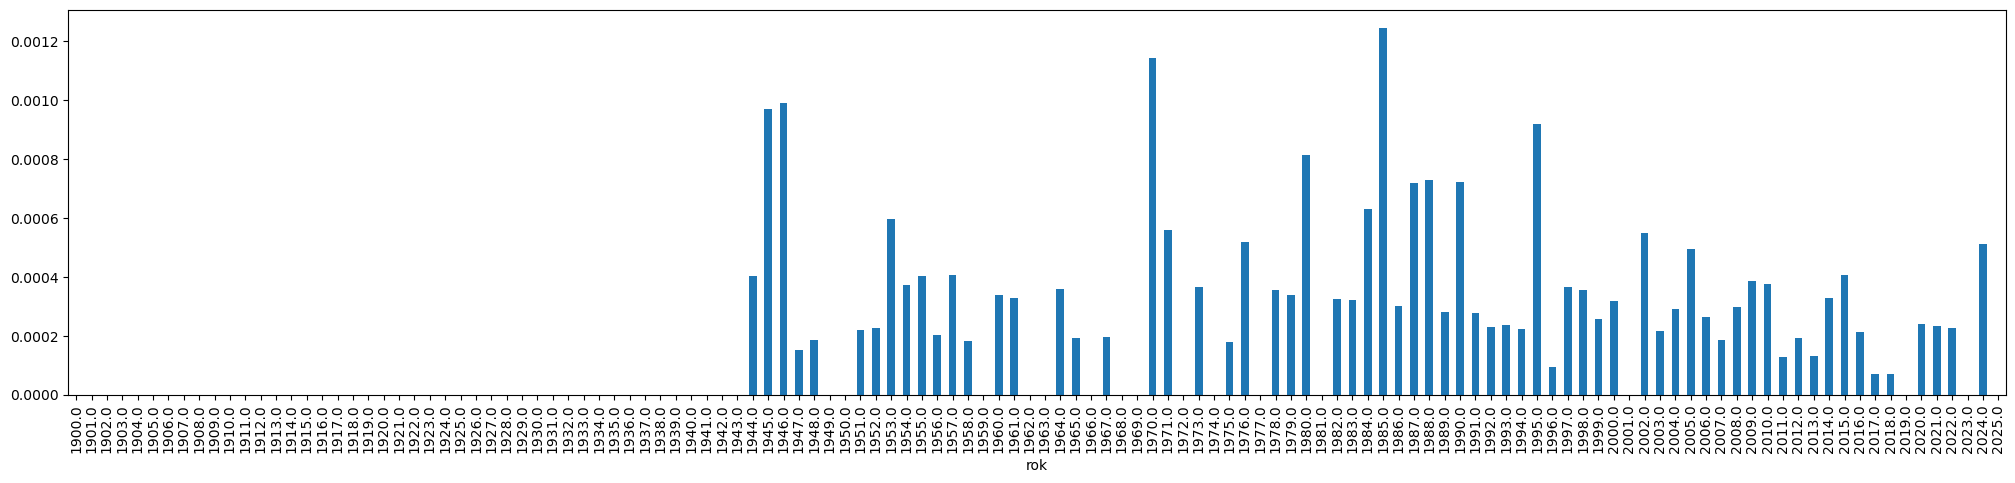

In [69]:
(df[df['letopocet'] == '1945'].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

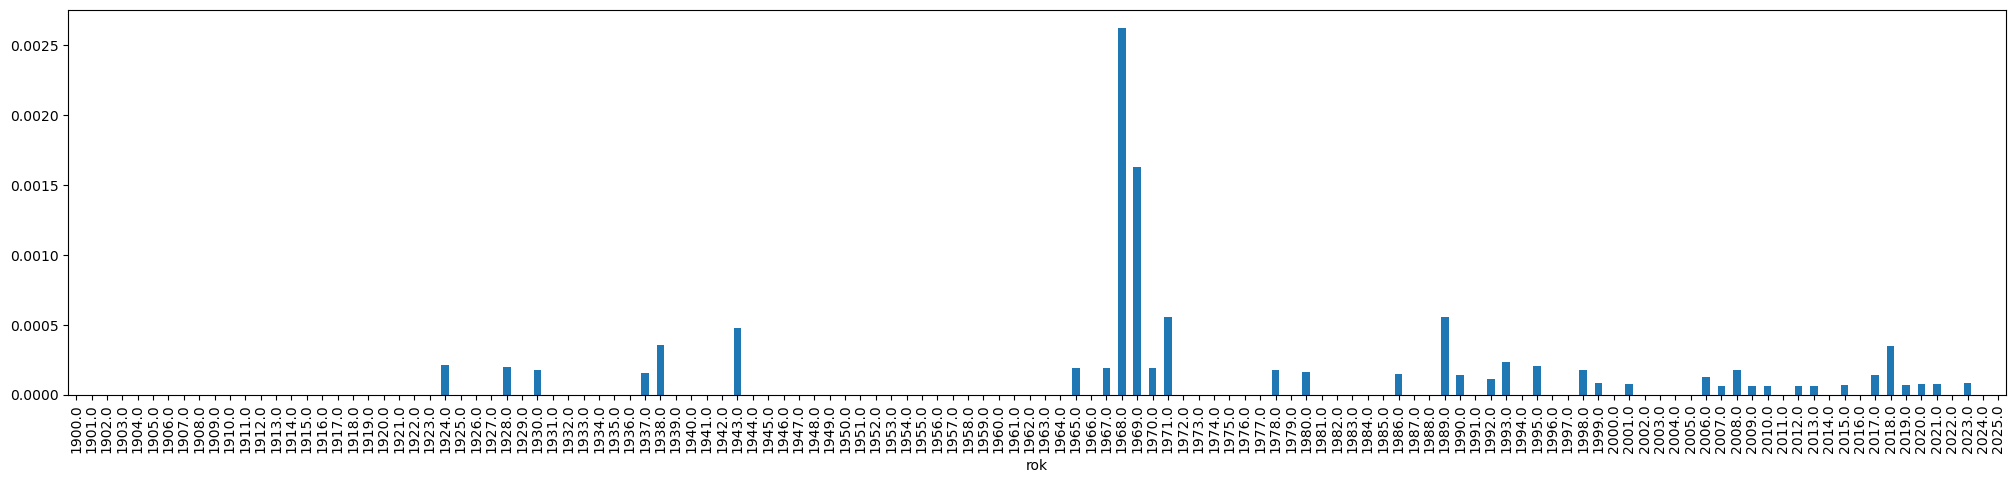

In [99]:
(df[df['letopocet'].str.contains('68',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

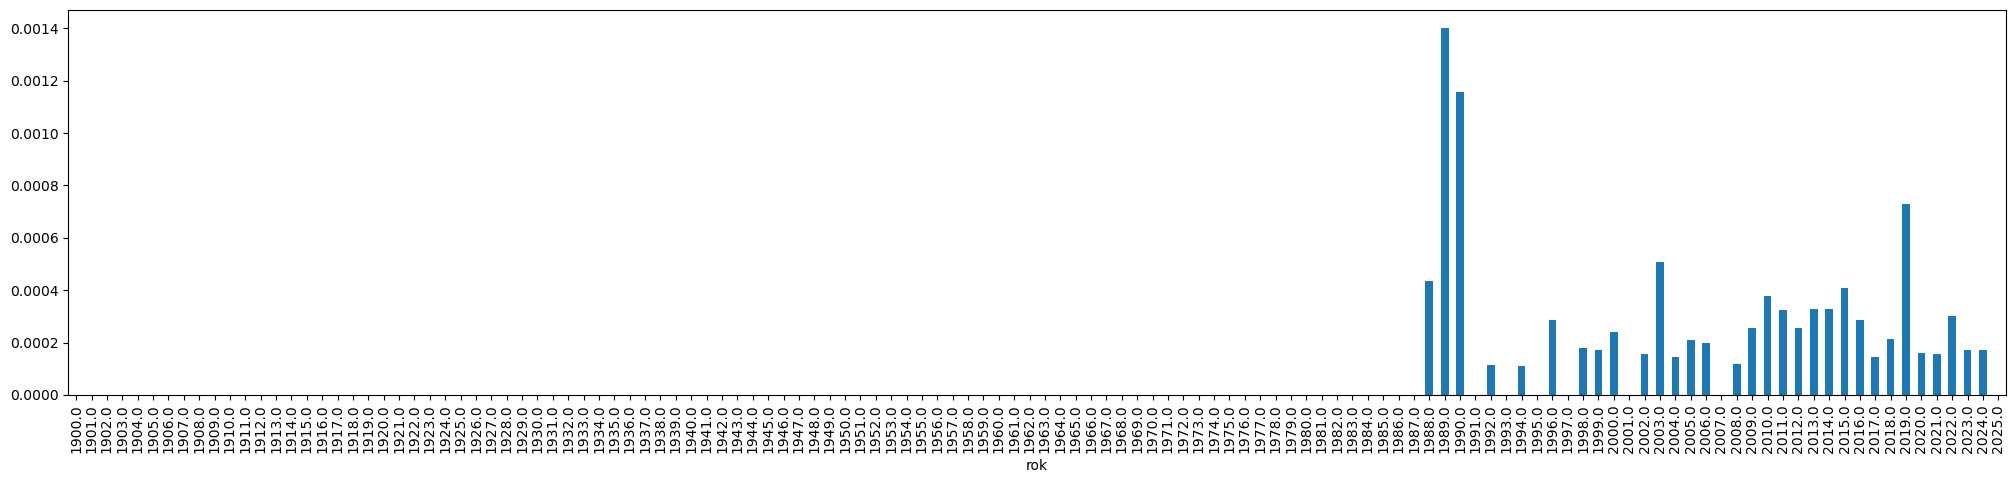

In [71]:
(df[df['letopocet'] == '1989'].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [57]:
df[(df['letopocet'].str.contains('198',na=False))].groupby('letopocet').size().nlargest(10)

letopocet
1989    117
1980     56
1981     28
1982     23
1985     23
1984     22
1983     18
1988     18
1986     13
1987      9
dtype: int64

In [43]:
df[(df['letopocet'] > '1900') & (df['letopocet'] < '2000')].groupby('letopocet').size().nsmallest(10)

letopocet
1909     6
1987     9
1915    11
1906    12
1916    12
1907    13
1986    13
1944    14
1943    17
1983    18
dtype: int64